In [5]:
import pandas as pd
import numpy as np

# Create synthetic customer data
np.random.seed(42)

data = {
    'CustomerID': range(1, 201),
    'Age': np.random.randint(18, 65, size=200),
    'AnnualIncome': np.random.randint(20_000, 120_000, size=200),
    'SpendingScore': np.random.randint(1, 101, size=200)
}

df = pd.DataFrame(data)

# Introduce missing values randomly in Age, AnnualIncome, and SpendingScore (10% missing values)
missing_values_count = int(df.shape[0] * 0.1)  # 10% missing values
missing_indices = np.random.choice(df.index, missing_values_count, replace=False)

# Set some values to NaN
df.loc[missing_indices, 'Age'] = np.nan
df.loc[missing_indices, 'AnnualIncome'] = np.nan
df.loc[missing_indices, 'SpendingScore'] = np.nan

df.head()


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,56.0,72733.0,36.0
1,2,NaN,NaN,NaN
2,3,32.0,109474.0,20.0
3,4,NaN,NaN,NaN
4,5,25.0,87172.0,8.0


In [7]:
# Check for missing values
df.isnull().sum()

CustomerID        0
Age              20
AnnualIncome     20
SpendingScore    20
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# Step 1: Handle missing values by filling them with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)
df['SpendingScore'].fillna(df['SpendingScore'].median(), inplace=True)

# Verify that the missing values have been filled
print(df.isnull().sum())

# Step 2: Select features for clustering
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Step 3: Scale the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


C:\Users\shour\AppData\Local\Temp\ipykernel_107016\1643876702.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\shour\AppData\Local\Temp\ipykernel_107016\1643876702.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

C:\Users\shour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

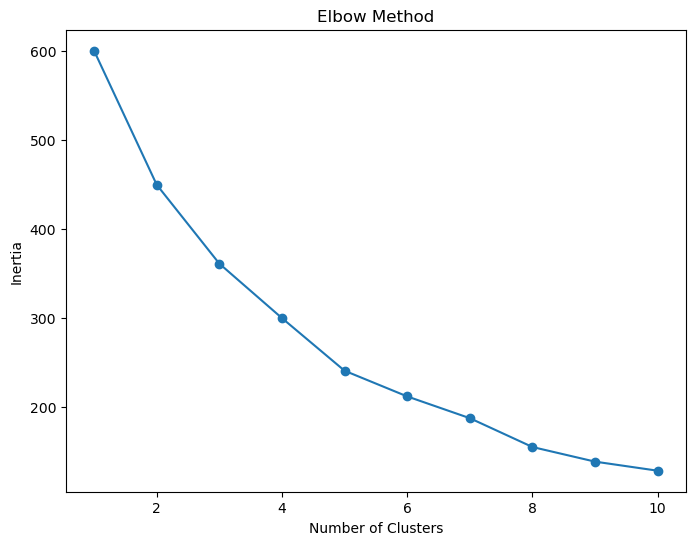

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 4: Elbow Method to find the optimal number of clusters
inertia = []  # To store inertia values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [13]:
# Step 5: Fit KMeans with 5 clusters (or use the optimal k from the Elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View the first few rows with cluster labels
print(df.head())


   CustomerID   Age  AnnualIncome  SpendingScore  Cluster
0           1  56.0       72733.0           36.0        2
1           2  42.5       66780.0           52.0        0
2           3  32.0      109474.0           20.0        1
3           4  42.5       66780.0           52.0        0
4           5  25.0       87172.0            8.0        1


C:\Users\shour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


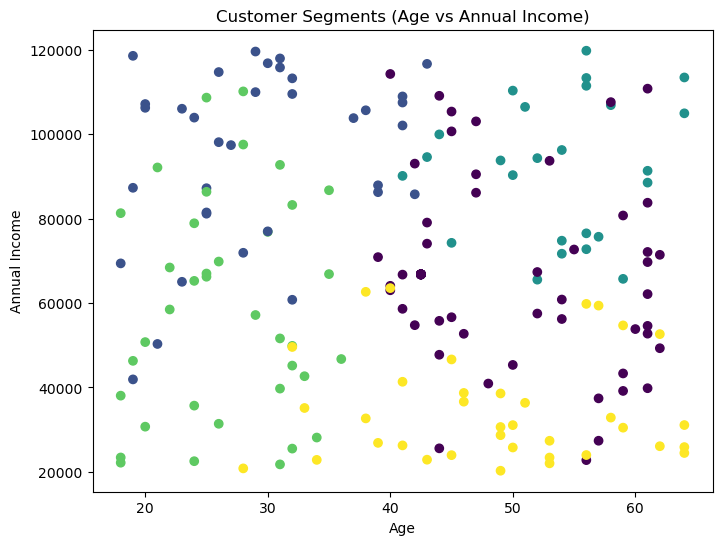

In [15]:
# Step 6: Visualize the clusters (Age vs Annual Income)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['AnnualIncome'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (Age vs Annual Income)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


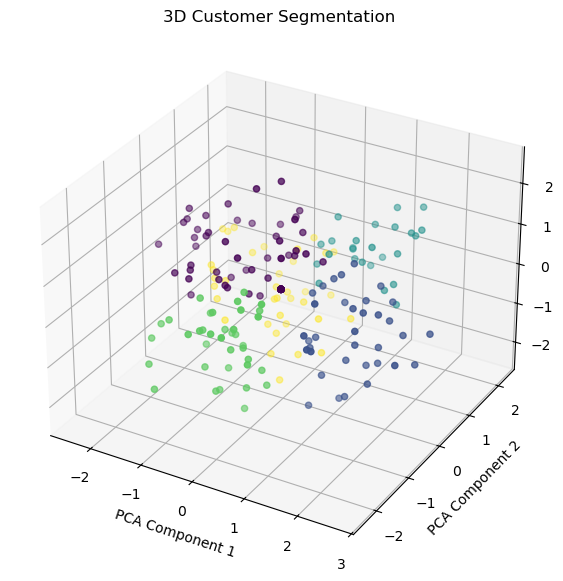

In [17]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3D scatter plot of clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Cluster'], cmap='viridis')
ax.set_title('3D Customer Segmentation')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

# Step 7: Calculate the Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.27511921324167593


In [21]:
# Step 8: Analyze each cluster's characteristics
segment_stats = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'AnnualIncome': ['mean', 'std'],
    'SpendingScore': ['mean', 'std']
})

print(segment_stats)


               Age            AnnualIncome               SpendingScore  \
              mean       std          mean           std          mean   
Cluster                                                                  
0        48.567164  7.719954  66863.388060  19850.235087     69.432836   
1        29.285714  7.652648  95189.714286  20566.910910     30.228571   
2        53.720000  6.161169  92073.400000  16321.194998     20.960000   
3        26.594595  5.509887  58533.486486  25710.734811     76.405405   
4        48.777778  9.792449  34906.527778  12911.042989     33.611111   

                    
               std  
Cluster             
0        17.738183  
1        18.623334  
2        12.548174  
3        18.194107  
4        18.856265  
